#### Pclass (Passenger Class)

1 = 1st class (luxury, wealthy passengers)

2 = 2nd class (middle-class)

3 = 3rd class (lower-class, more crowded cabins)


#### SibSp (Siblings/Spouses Aboard)

Number of siblings or spouses traveling with the passenger.


#### Parch (Parents/Children Aboard)
Number of parents or children traveling with the passenger.

#### Fare
Amount paid for the ticket.
Higher fares = more likely 1st class → higher survival chances.


#### Embarked (Port of Embarkation)
The port where the passenger boarded the Titanic:

C = Cherbourg, France

Q = Queenstown (now Cobh), Ireland

S = Southampton, England

In [723]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [724]:
df = pd.read_csv("train.csv")

In [725]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [726]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [727]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [728]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [729]:
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1

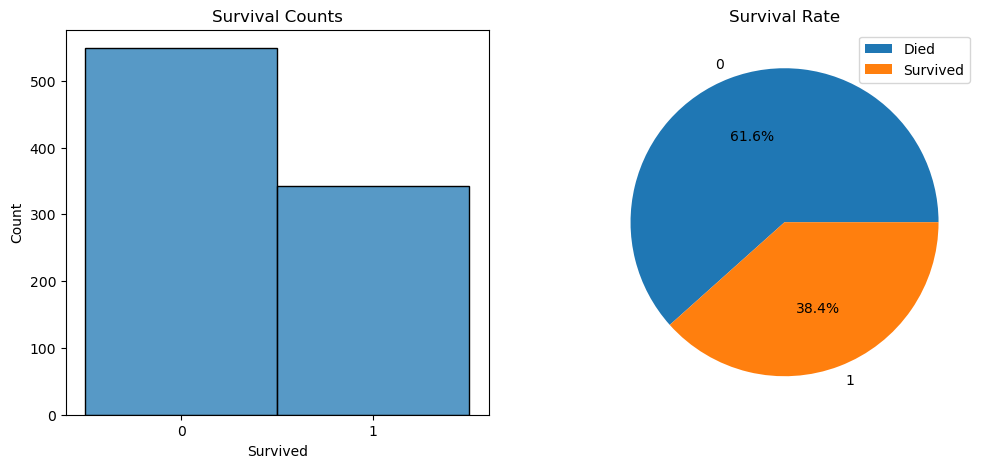

In [730]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df["Survived"], bins=2, discrete=True, ax=axes[0])
axes[0].set_title("Survival Counts")
axes[0].set_xticks([0, 1])
axes[0].set_xlabel("Survived")

survived_counts = df["Survived"].value_counts()
survived_counts.plot(kind="pie", autopct="%1.1f%%", ax=axes[1])
axes[1].set_xlabel("")
axes[1].set_ylabel("")
axes[1].set_title("Survival Rate")
axes[1].legend(["Died", "Survived"])
plt.show()

In [731]:
df.groupby("Survived")["Pclass"].value_counts()

Survived  Pclass
0         3         372
          2          97
          1          80
1         1         136
          3         119
          2          87
Name: count, dtype: int64

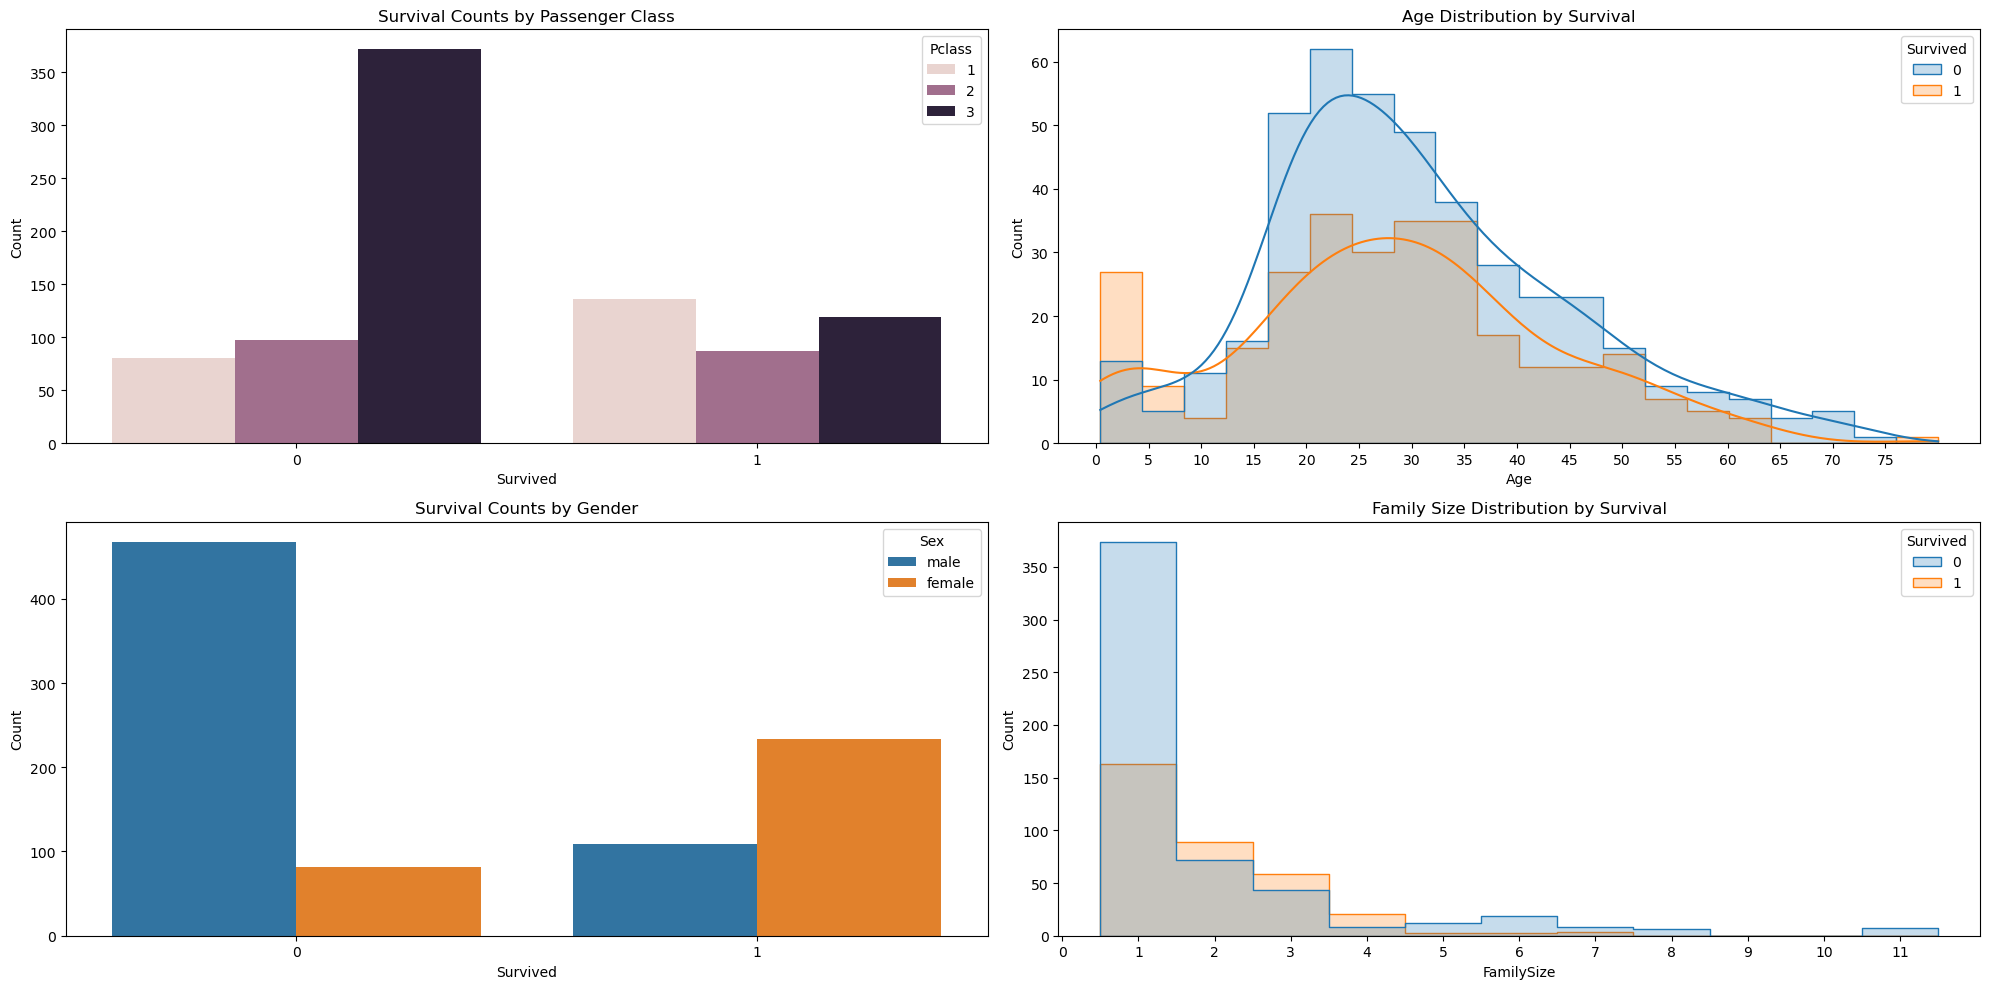

In [732]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
sns.countplot(x="Survived", hue="Pclass", data=df, ax=axes[0,0])
axes[0,0].set_title("Survival Counts by Passenger Class")
axes[0,0].set_xlabel("Survived")
axes[0,0].set_ylabel("Count")

sns.histplot(data=df, x="Age", hue="Survived", kde=True, element="step", ax=axes[0,1])
axes[0,1].set_xticks(range(0, 80, 5))
axes[0,1].set_title("Age Distribution by Survival")

sns.countplot(x="Survived", hue="Sex", data=df, ax=axes[1,0])
axes[1,0].set_title("Survival Counts by Gender")
axes[1,0].set_xlabel("Survived")
axes[1,0].set_ylabel("Count")

sns.histplot(data=df, x="FamilySize", hue="Survived", element="step", discrete=True, bins = 12, ax=axes[1,1])
axes[1,1].set_xticks(range(0, 12, 1))
axes[1,1].set_title("Family Size Distribution by Survival")

plt.tight_layout()
plt.show()

### Comments:
1. P_Class: Survival of 1st class > 3rd class > 2nd class. This seems off so we need to double check by using percentage rate of each class.
2. Female survival potential is higher than male.
3. 15 to 50 years old, most survived, and most died. Most passengers were between 15–50 → so naturally most survivors and non-survivors come from this group.
4. FamilySize: Passengers traveling alone (FamilySize = 1) had lower survival.
Small families (2–4) had better survival rates.
Very large families (>5) had poor survival again.

#### 1. Percentage rates of survival in terms of class.

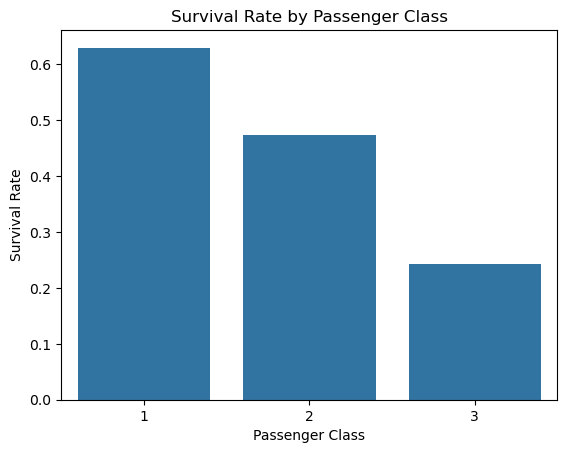

In [733]:
survival_rate_by_class = df.groupby("Pclass")["Survived"].mean().reset_index()
sns.barplot(x="Pclass", y="Survived", data=survival_rate_by_class)
plt.title("Survival Rate by Passenger Class")
plt.ylabel("Survival Rate")
plt.xlabel("Passenger Class")
plt.show()

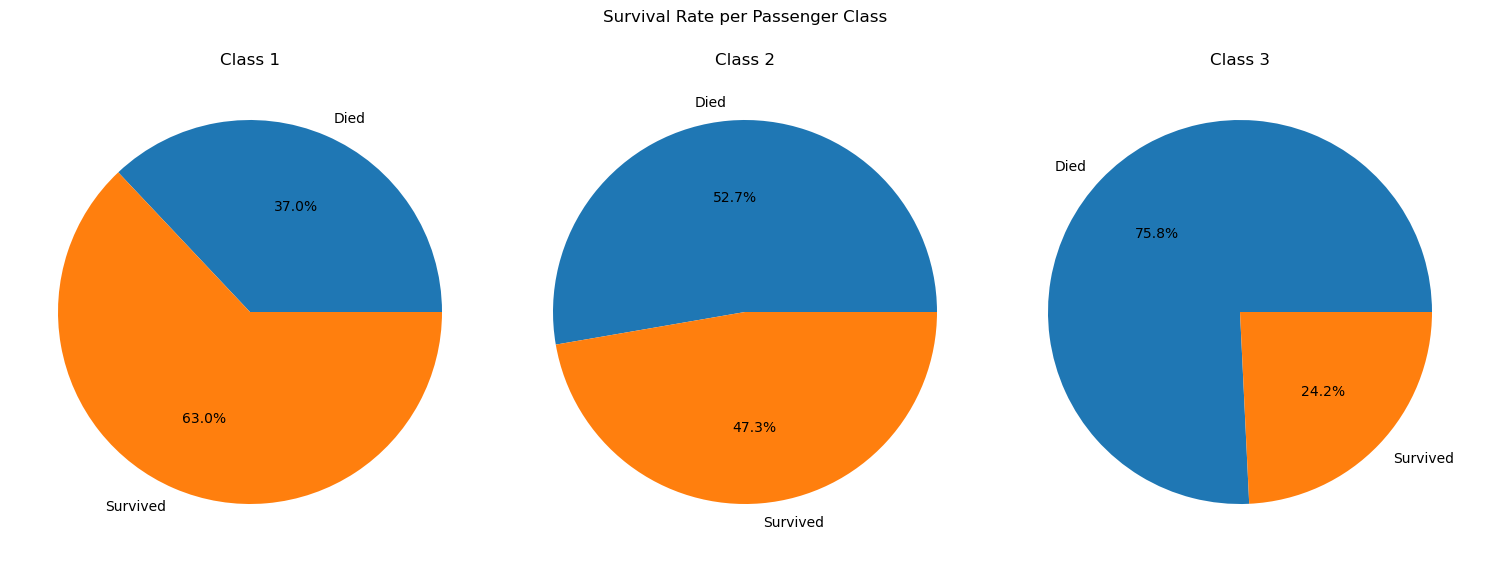

In [734]:
classes = sorted(df["Pclass"].unique())
fig, axes = plt.subplots(1, len(classes), figsize=(5 * len(classes), 6))
if len(classes) == 1:
    axes = [axes]

for ax, pclass in zip(axes, classes):
    counts = (
        df[df["Pclass"] == pclass]["Survived"].value_counts().reindex([0, 1], fill_value=0)
    )
    counts.plot(kind="pie", autopct="%1.1f%%", labels=["Died", "Survived"], ax=ax)
    ax.set_title(f"Class {pclass}")
    ax.set_ylabel("")

plt.suptitle("Survival Rate per Passenger Class")
plt.tight_layout()
plt.show()

#### As we can see, the rate of survival of first class is > second class > third class. Logic

### 2. Age ranges

AgeGroup
Child          0.573529
Teen           0.488889
Adult          0.417969
Senior         0.356164
Young Adult    0.350554
Name: Survived, dtype: float64


/var/folders/yy/p245jml91f9f3v3whpztlz6w0000gn/T/ipykernel_1590/3635493793.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rates = df.groupby("AgeGroup")["Survived"].mean()


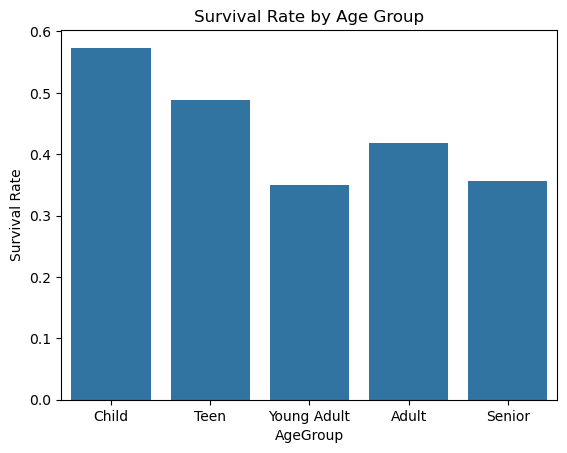

In [735]:
bins = [0, 12, 18, 30, 50, 80]
labels = ["Child", "Teen", "Young Adult", "Adult", "Senior"]
df["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels, right=False)

survival_rates = df.groupby("AgeGroup")["Survived"].mean()
print(survival_rates.sort_values(ascending=False))

sns.barplot(x=survival_rates.index, y=survival_rates.values)
plt.title("Survival Rate by Age Group")
plt.ylabel("Survival Rate")
plt.show()

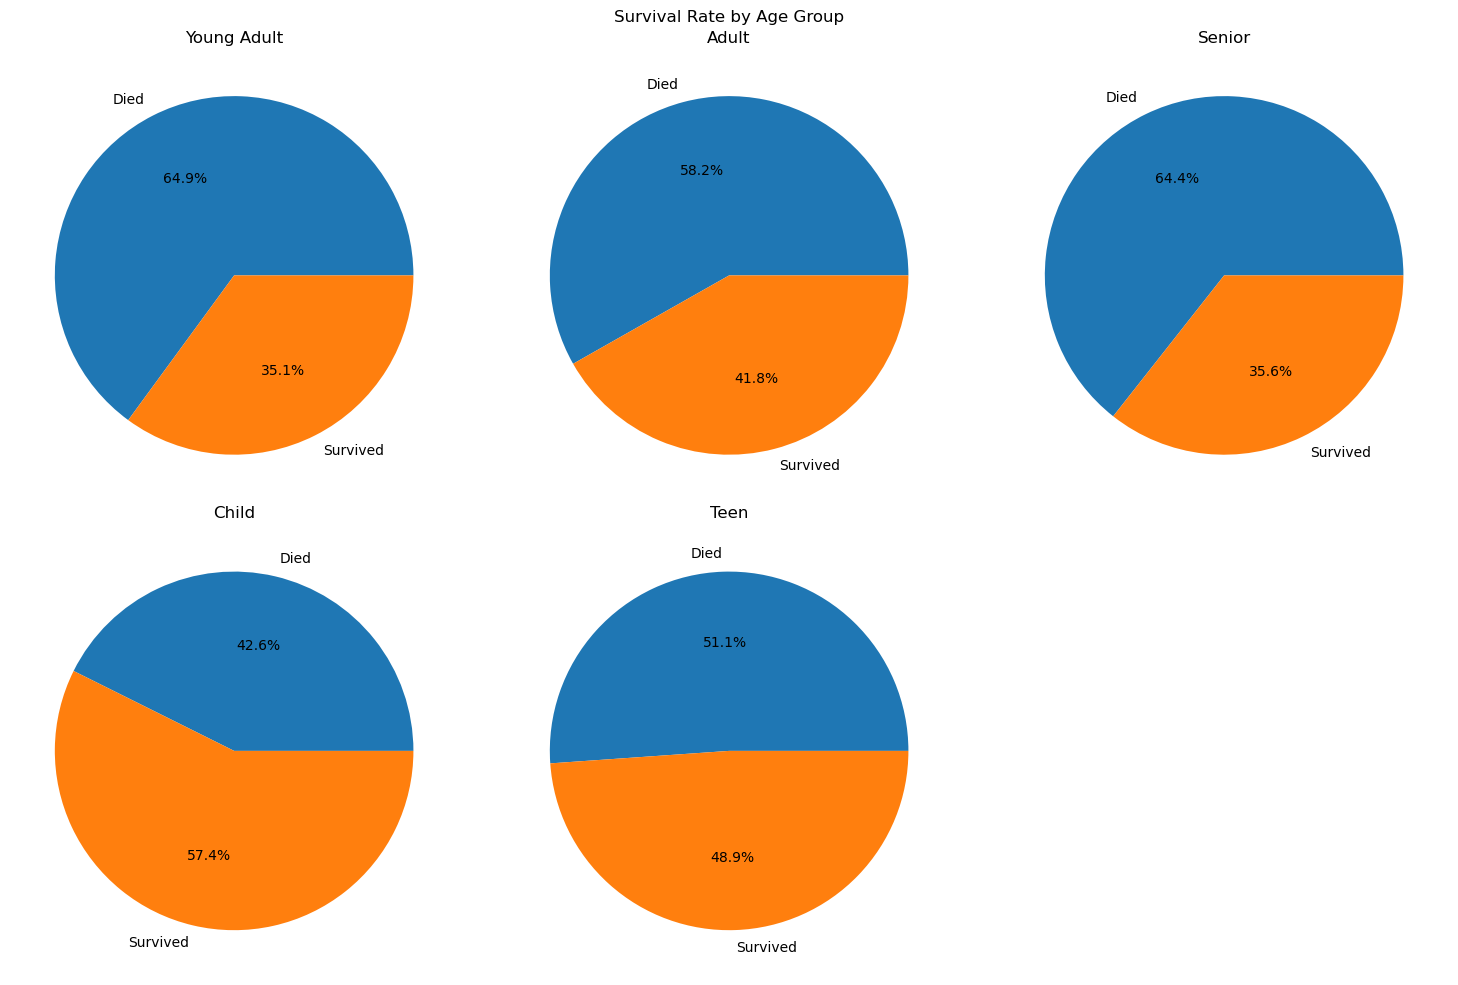

In [736]:
age_groups = df["AgeGroup"].dropna().unique()
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, age_group in enumerate(age_groups):
    if i < len(axes):
        counts = (
            df[df["AgeGroup"] == age_group]["Survived"].value_counts().reindex([0, 1], fill_value=0)
        )
        counts.plot(kind="pie", autopct="%1.1f%%", labels=["Died", "Survived"], ax=axes[i])
        axes[i].set_title(f"{age_group}")
        axes[i].set_ylabel("")

# Hide unused subplots
for i in range(len(age_groups), len(axes)):
    axes[i].set_visible(False)

plt.suptitle("Survival Rate by Age Group")
plt.tight_layout()
plt.show()

#### We see that percentage of child survival is > Teen > Adult > Senior > Young Adult

## I will get the fare/person

In [737]:
df["FarePerPerson"] = df["Fare"] / df["FamilySize"]

In [738]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,AgeGroup,FarePerPerson
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Young Adult,3.62500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Adult,35.64165
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Young Adult,7.92500
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Adult,26.55000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Adult,8.05000


In [739]:
df.drop(columns=["Fare", "SibSp", "Parch"], inplace=True)

In [740]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Cabin,Embarked,FamilySize,AgeGroup,FarePerPerson
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,NaN,S,2,Young Adult,3.62500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,C85,C,2,Adult,35.64165
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,NaN,S,1,Young Adult,7.92500
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,C123,S,2,Adult,26.55000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,NaN,S,1,Adult,8.05000


In [741]:
df.isna().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age              177
Ticket             0
Cabin            687
Embarked           2
FamilySize         0
AgeGroup         178
FarePerPerson      0
dtype: int64

In [742]:
df[df["Age"].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Cabin,Embarked,FamilySize,AgeGroup,FarePerPerson
5,6,0,3,"Moran, Mr. James",male,NaN,330877,NaN,Q,1,NaN,8.458300
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,244373,NaN,S,1,NaN,13.000000
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,2649,NaN,C,1,NaN,7.225000
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,2631,NaN,C,1,NaN,7.225000
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,330959,NaN,Q,1,NaN,7.879200
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,2629,NaN,C,1,NaN,7.229200
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,CA. 2343,NaN,S,11,NaN,6.322727
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,345777,NaN,S,1,NaN,9.500000
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,349217,NaN,S,1,NaN,7.895800


### We can fill the age based on the title in the name.

In [743]:
df["Title"] = df["Name"].str.extract(r",\s*([^\.]+)\.")

In [744]:
df["Title"].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [745]:
title_mapping = {
    "Mr": "Mr",
    "Miss": "Miss",
    "Mrs": "Mrs",
    "Master": "Master",
    "Dr": "Rare",
    "Rev": "Rare",
    "Col": "Rare",
    "Major": "Rare",
    "Mlle": "Miss",
    "Ms": "Miss",
    "Mme": "Mrs",
    "Lady": "Rare",
    "Countess": "Rare",
    "Sir": "Rare",
    "Jonkheer": "Rare",
    "Don": "Rare",
    "Dona": "Rare",
    "Capt": "Rare"
}

df["Title"] = df["Title"].map(title_mapping)

In [746]:
df["Title"].value_counts()

Title
Mr        517
Miss      185
Mrs       126
Master     40
Rare       22
Name: count, dtype: int64

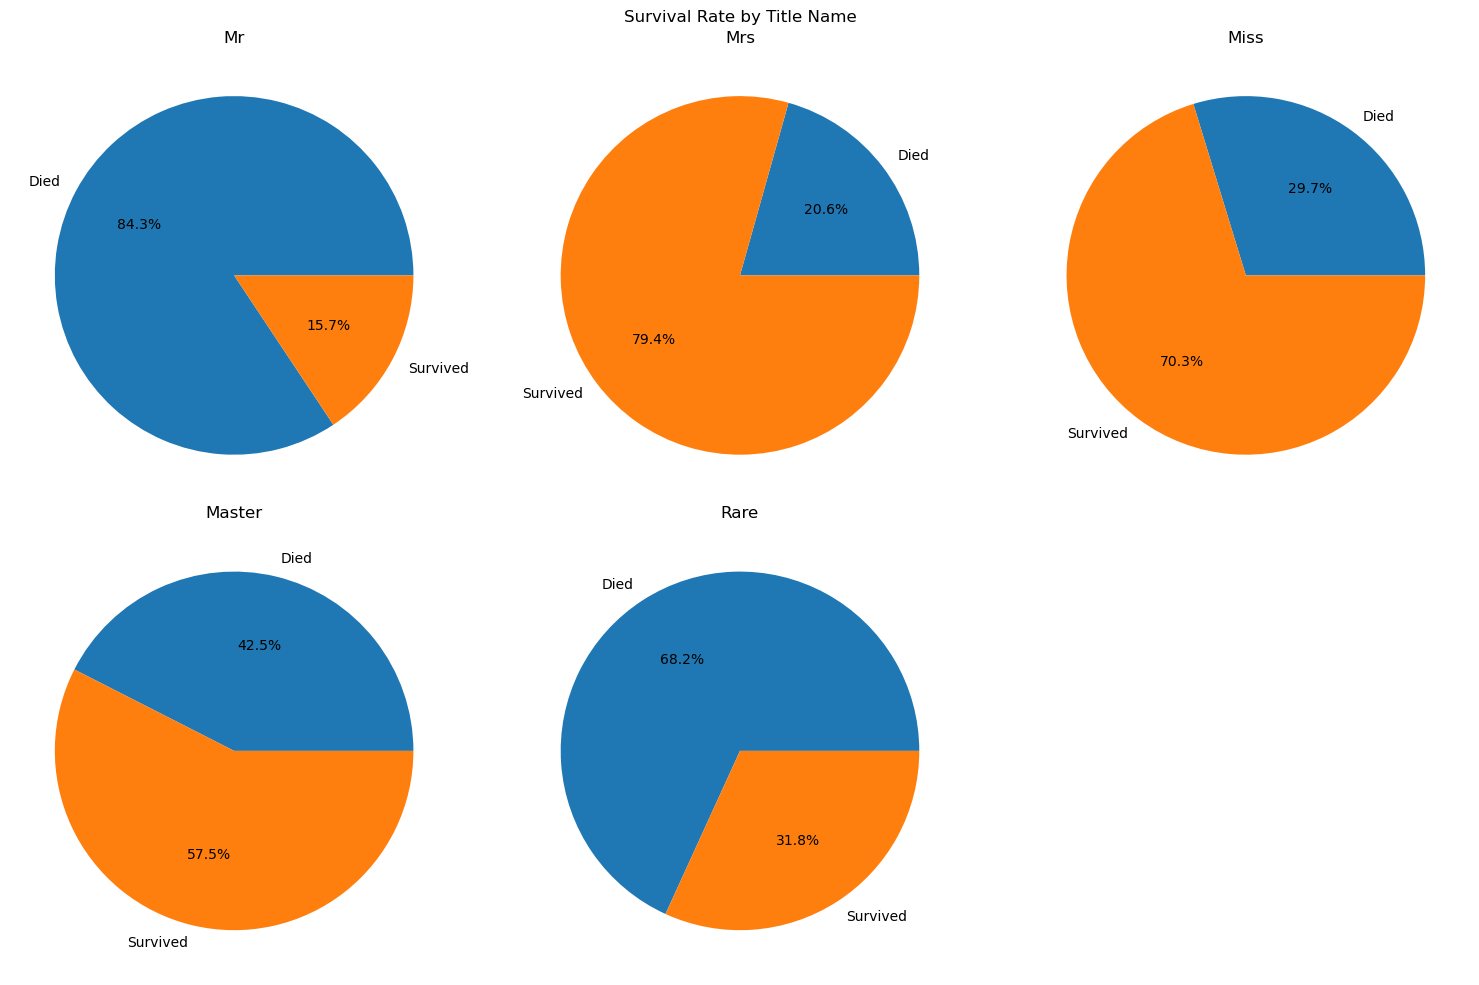

In [747]:
title_names = df["Title"].dropna().unique()
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, title_name in enumerate(title_names):
    if i < len(axes):
        counts = (
            df[df["Title"] == title_name]["Survived"].value_counts().reindex([0, 1], fill_value=0)
        )
        counts.plot(kind="pie", autopct="%1.1f%%", labels=["Died", "Survived"], ax=axes[i])
        axes[i].set_title(f"{title_name}")
        axes[i].set_ylabel("")

# Hide unused subplots
for i in range(len(title_names), len(axes)):
    axes[i].set_visible(False)

plt.suptitle("Survival Rate by Title Name")
plt.tight_layout()
plt.show()

In [748]:
df["Age"] = df.groupby("Title")["Age"].transform(lambda x: x.fillna(x.mean()))

#### We Still have NaN values for the Rare titles, so we are going to fill using median of PClass.

In [749]:
df["Age"] = df.groupby("Pclass")["Age"].transform(lambda x: x.fillna(x.median()))

In [750]:
df.isna().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age                0
Ticket             0
Cabin            687
Embarked           2
FamilySize         0
AgeGroup         178
FarePerPerson      0
Title              1
dtype: int64

### To see which cabins were closer to the lifeboats.

In [751]:
df["CabinDeck"] = df["Cabin"].str[0]

<Axes: xlabel='CabinDeck', ylabel='count'>

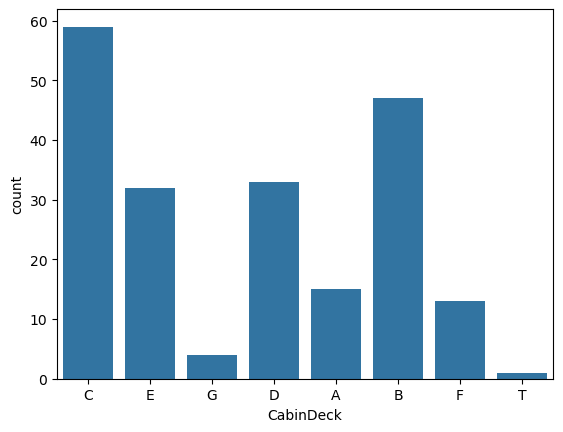

In [752]:
sns.countplot(x="CabinDeck", data=df)

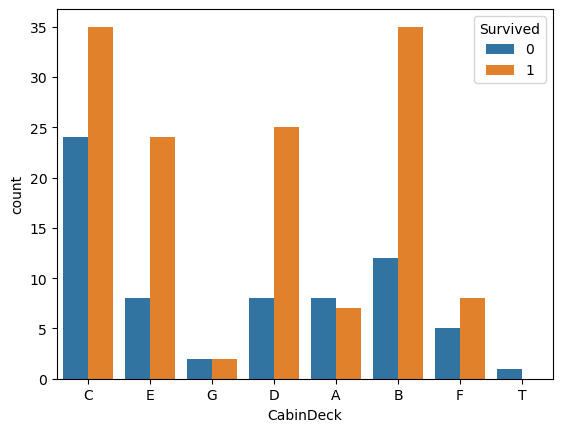

In [753]:
sns.countplot(x="CabinDeck", hue="Survived", data=df)
plt.show()

### Cabins: C, B, E, D Had higher survival rates.

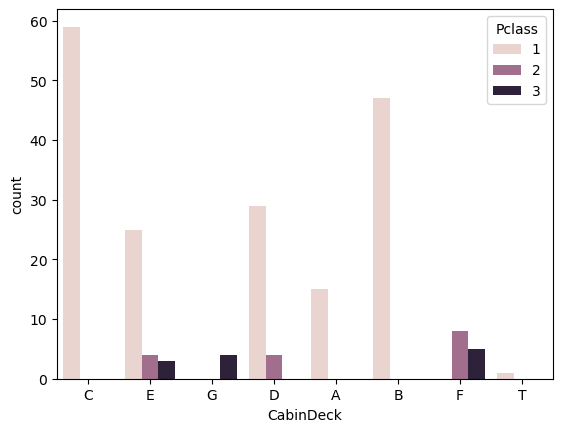

In [754]:
sns.countplot(x="CabinDeck", hue="Pclass", data=df)
plt.show()

In [755]:
df["CabinDeck"] = df["Cabin"].str[0].fillna("Unknown")

In [756]:
df.drop(columns=["Cabin"], inplace=True)

In [757]:
df.isna().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age                0
Ticket             0
Embarked           2
FamilySize         0
AgeGroup         178
FarePerPerson      0
Title              1
CabinDeck          0
dtype: int64

In [758]:
df[df["Embarked"].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Embarked,FamilySize,AgeGroup,FarePerPerson,Title,CabinDeck
61,62,1,1,"Icard, Miss. Amelie",female,38.0,113572,NaN,1,Adult,80.0,Miss,B
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,113572,NaN,1,Senior,80.0,Mrs,B


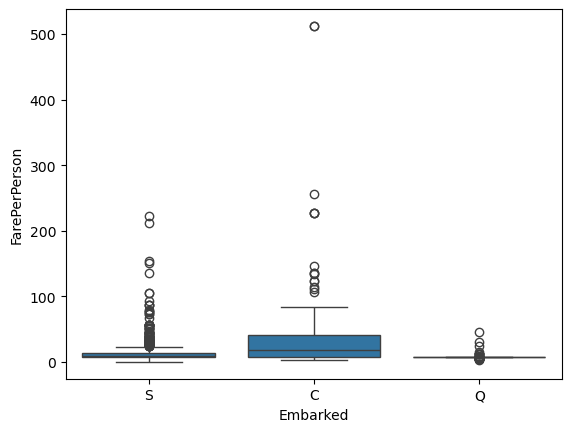

In [759]:
sns.boxplot(x="Embarked", y="FarePerPerson", data=df)
plt.show()

In [760]:
df["Embarked"].fillna("C", inplace=True)

/var/folders/yy/p245jml91f9f3v3whpztlz6w0000gn/T/ipykernel_1590/593853872.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Embarked"].fillna("C", inplace=True)


In [761]:
df.isna().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age                0
Ticket             0
Embarked           0
FamilySize         0
AgeGroup         178
FarePerPerson      0
Title              1
CabinDeck          0
dtype: int64

In [762]:
bins = [0, 12, 18, 30, 50, 80]
labels = ["Child", "Teen", "Young Adult", "Adult", "Senior"]
df["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels, right=False)

In [763]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
Ticket           0
Embarked         0
FamilySize       0
AgeGroup         1
FarePerPerson    0
Title            1
CabinDeck        0
dtype: int64

In [764]:
df.dropna(subset=["AgeGroup"], inplace=True)

In [765]:
df[df["Title"].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Embarked,FamilySize,AgeGroup,FarePerPerson,Title,CabinDeck
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,35.788991,110152,S,1,Adult,86.5,NaN,B


In [766]:
df["Title"].fillna("Rare", inplace=True)

/var/folders/yy/p245jml91f9f3v3whpztlz6w0000gn/T/ipykernel_1590/3962090832.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Title"].fillna("Rare", inplace=True)


In [767]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
Ticket           0
Embarked         0
FamilySize       0
AgeGroup         0
FarePerPerson    0
Title            0
CabinDeck        0
dtype: int64

### Feature Encoding

In [768]:
df.drop(columns=["Name", "Ticket", "PassengerId"], inplace=True)

In [769]:
df.head()

,Survived,Pclass,Sex,Age,Embarked,FamilySize,AgeGroup,FarePerPerson,Title,CabinDeck
0,0,3,male,22.0,S,2,Young Adult,3.62500,Mr,Unknown
1,1,1,female,38.0,C,2,Adult,35.64165,Mrs,C
2,1,3,female,26.0,S,1,Young Adult,7.92500,Miss,Unknown
3,1,1,female,35.0,S,2,Adult,26.55000,Mrs,C
4,0,3,male,35.0,S,1,Adult,8.05000,Mr,Unknown


In [770]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [771]:
df.head()

,Survived,Pclass,Sex,Age,Embarked,FamilySize,AgeGroup,FarePerPerson,Title,CabinDeck
0,0,3,0,22.0,S,2,Young Adult,3.62500,Mr,Unknown
1,1,1,1,38.0,C,2,Adult,35.64165,Mrs,C
2,1,3,1,26.0,S,1,Young Adult,7.92500,Miss,Unknown
3,1,1,1,35.0,S,2,Adult,26.55000,Mrs,C
4,0,3,0,35.0,S,1,Adult,8.05000,Mr,Unknown


In [772]:
df["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [773]:
df["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object)

In [774]:
df= pd.get_dummies(df, columns= ["Embarked", "Title"], drop_first= True)

In [775]:
df["CabinDeck"].unique()

array(['Unknown', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

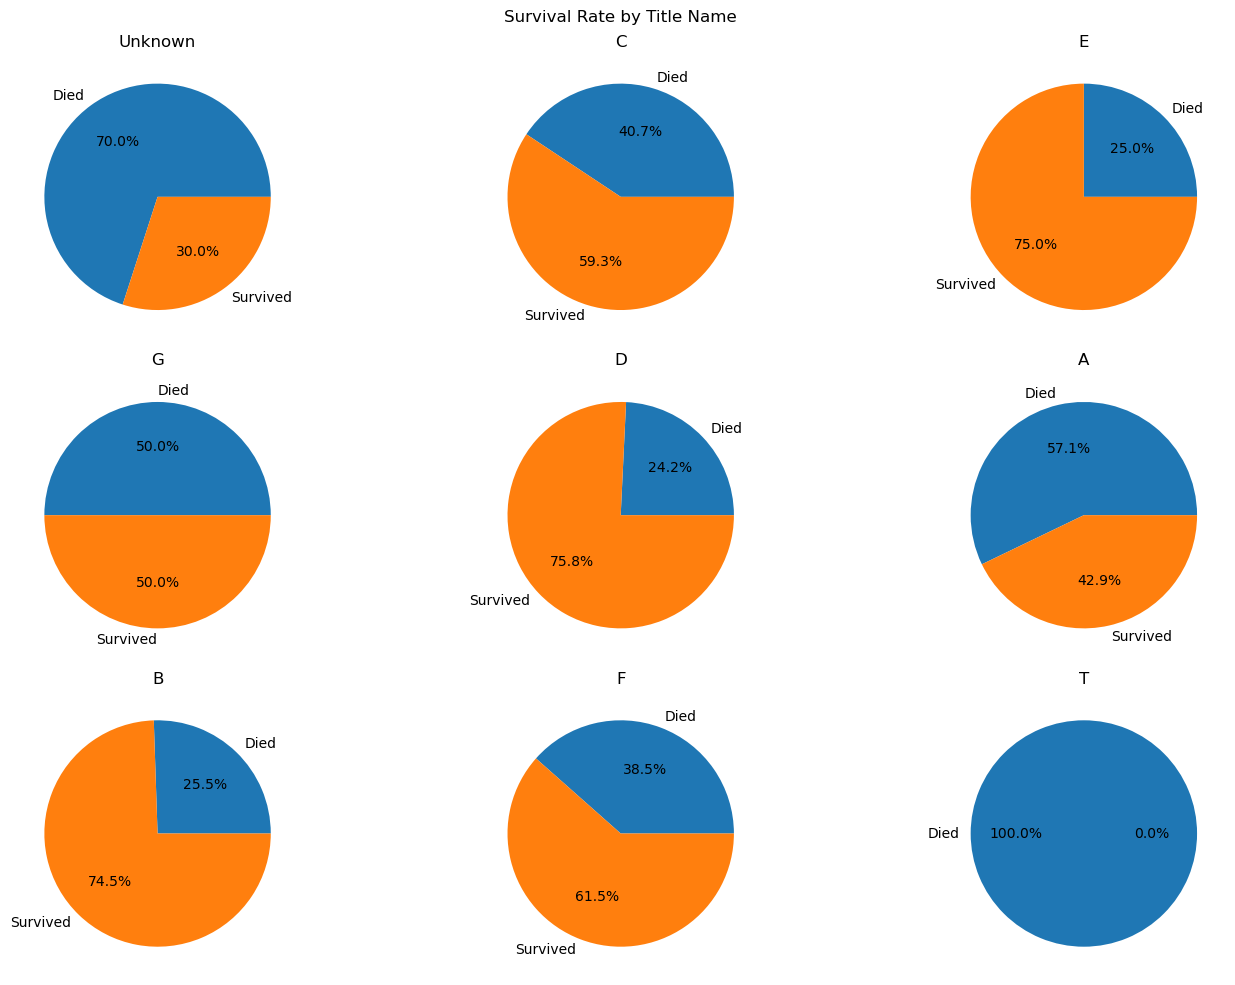

In [776]:
cabindecks_names = df["CabinDeck"].dropna().unique()
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.flatten()

for i, cabindecks_name in enumerate(cabindecks_names):
    if i < len(axes):
        counts = (
            df[df["CabinDeck"] == cabindecks_name]["Survived"].value_counts().reindex([0, 1], fill_value=0)
        )
        counts.plot(kind="pie", autopct="%1.1f%%", labels=["Died", "Survived"], ax=axes[i])
        axes[i].set_title(f"{cabindecks_name}")
        axes[i].set_ylabel("")

# Hide unused subplots
for i in range(len(cabindecks_names), len(axes)):
    axes[i].set_visible(False)

plt.suptitle("Survival Rate by Title Name")
plt.tight_layout()
plt.show()

### We can encode cabins by survival rates to avoid having many new columns with high correlation.

#### D > E > B > F > C > G > A > Unknown > T

In [777]:
cabin_deck_mapping = {
    'D': 0,       
    'E': 1,          
    'B': 2,  
    'F': 3,        
    'C': 4,
    'G' : 5,
    'A' : 6,
    'Unknown' : 7,
    'T': 8        
}

df["CabinDeck"] = df["CabinDeck"].map(cabin_deck_mapping)

In [778]:
df.head()

,Survived,Pclass,Sex,Age,FamilySize,AgeGroup,FarePerPerson,CabinDeck,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,3,0,22.0,2,Young Adult,3.62500,7,False,True,False,True,False,False
1,1,1,1,38.0,2,Adult,35.64165,4,False,False,False,False,True,False
2,1,3,1,26.0,1,Young Adult,7.92500,7,False,True,True,False,False,False
3,1,1,1,35.0,2,Adult,26.55000,4,False,True,False,False,True,False
4,0,3,0,35.0,1,Adult,8.05000,7,False,True,False,True,False,False


In [779]:
bool_columns = df.select_dtypes(include=['bool']).columns
df[bool_columns] = df[bool_columns].astype(int)

In [780]:
df.head()

,Survived,Pclass,Sex,Age,FamilySize,AgeGroup,FarePerPerson,CabinDeck,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,3,0,22.0,2,Young Adult,3.62500,7,0,1,0,1,0,0
1,1,1,1,38.0,2,Adult,35.64165,4,0,0,0,0,1,0
2,1,3,1,26.0,1,Young Adult,7.92500,7,0,1,1,0,0,0
3,1,1,1,35.0,2,Adult,26.55000,4,0,1,0,0,1,0
4,0,3,0,35.0,1,Adult,8.05000,7,0,1,0,1,0,0


In [781]:
age_group_mapping = {
    'Child': 0,       
    'Teen': 1,          
    'Young Adult': 2,  
    'Adult': 3,        
    'Senior': 4        
}

df["AgeGroup"] = df["AgeGroup"].map(age_group_mapping)

In [782]:
df.head()

,Survived,Pclass,Sex,Age,FamilySize,AgeGroup,FarePerPerson,CabinDeck,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,3,0,22.0,2,2,3.62500,7,0,1,0,1,0,0
1,1,1,1,38.0,2,3,35.64165,4,0,0,0,0,1,0
2,1,3,1,26.0,1,2,7.92500,7,0,1,1,0,0,0
3,1,1,1,35.0,2,3,26.55000,4,0,1,0,0,1,0
4,0,3,0,35.0,1,3,8.05000,7,0,1,0,1,0,0


In [783]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'FamilySize', 'AgeGroup',
       'FarePerPerson', 'CabinDeck', 'Embarked_Q', 'Embarked_S', 'Title_Miss',
       'Title_Mr', 'Title_Mrs', 'Title_Rare'],
      dtype='object')

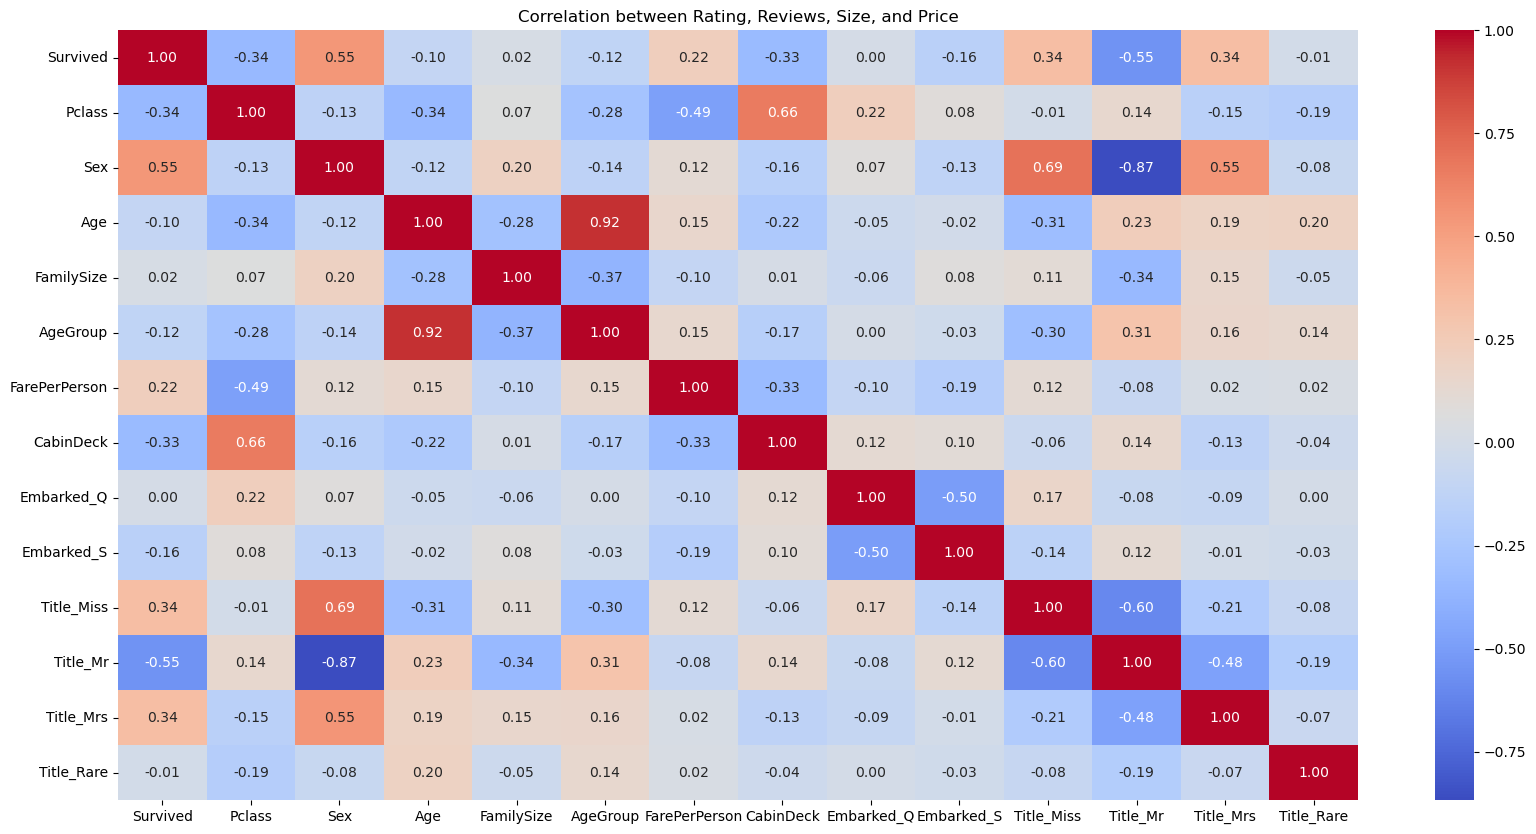

In [784]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between Rating, Reviews, Size, and Price")
plt.show()

### Comments
1. Survived: 
- (0.55) with Sex.
- (-0.55) with Title_Mr, rate of Mr surviving is less than Mrs. 
    - Those 2 are correlated as sex is like the title based on Mr -> Male, Mrs -> Female

2. Check correlation between features:
- Pclass vs fareperperson (-0.49)
- Pclass vs CabinDeck_unknown (0.72), as when 3rd class we usually don't find its cabinDeck
- sex vs title_miss (0.69)
- sex vs title mr (-0.87)
- sex vs title_mrs (0.55)
    - Sex is highly correlated with titles. We could combine titles as (Mr -> Male title) (Mrs, Miss -> Female title)
- Embarked_S vs Embarked_Q (-0.5)
- Title_Miss vs Title_Mr (-0.6)

In [785]:
df.head()

,Survived,Pclass,Sex,Age,FamilySize,AgeGroup,FarePerPerson,CabinDeck,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,3,0,22.0,2,2,3.62500,7,0,1,0,1,0,0
1,1,1,1,38.0,2,3,35.64165,4,0,0,0,0,1,0
2,1,3,1,26.0,1,2,7.92500,7,0,1,1,0,0,0
3,1,1,1,35.0,2,3,26.55000,4,0,1,0,0,1,0
4,0,3,0,35.0,1,3,8.05000,7,0,1,0,1,0,0


### Since title is correlated with sex, we will drop title column.

### We will drop Age as AgeGroup is more informative.

In [786]:
df.drop(columns=["Title_Miss", 'Title_Mr',
       'Title_Mrs', "Title_Rare", "Age"], inplace= True)

In [787]:
df.head()

,Survived,Pclass,Sex,FamilySize,AgeGroup,FarePerPerson,CabinDeck,Embarked_Q,Embarked_S
0,0,3,0,2,2,3.62500,7,0,1
1,1,1,1,2,3,35.64165,4,0,0
2,1,3,1,1,2,7.92500,7,0,1
3,1,1,1,2,3,26.55000,4,0,1
4,0,3,0,1,3,8.05000,7,0,1


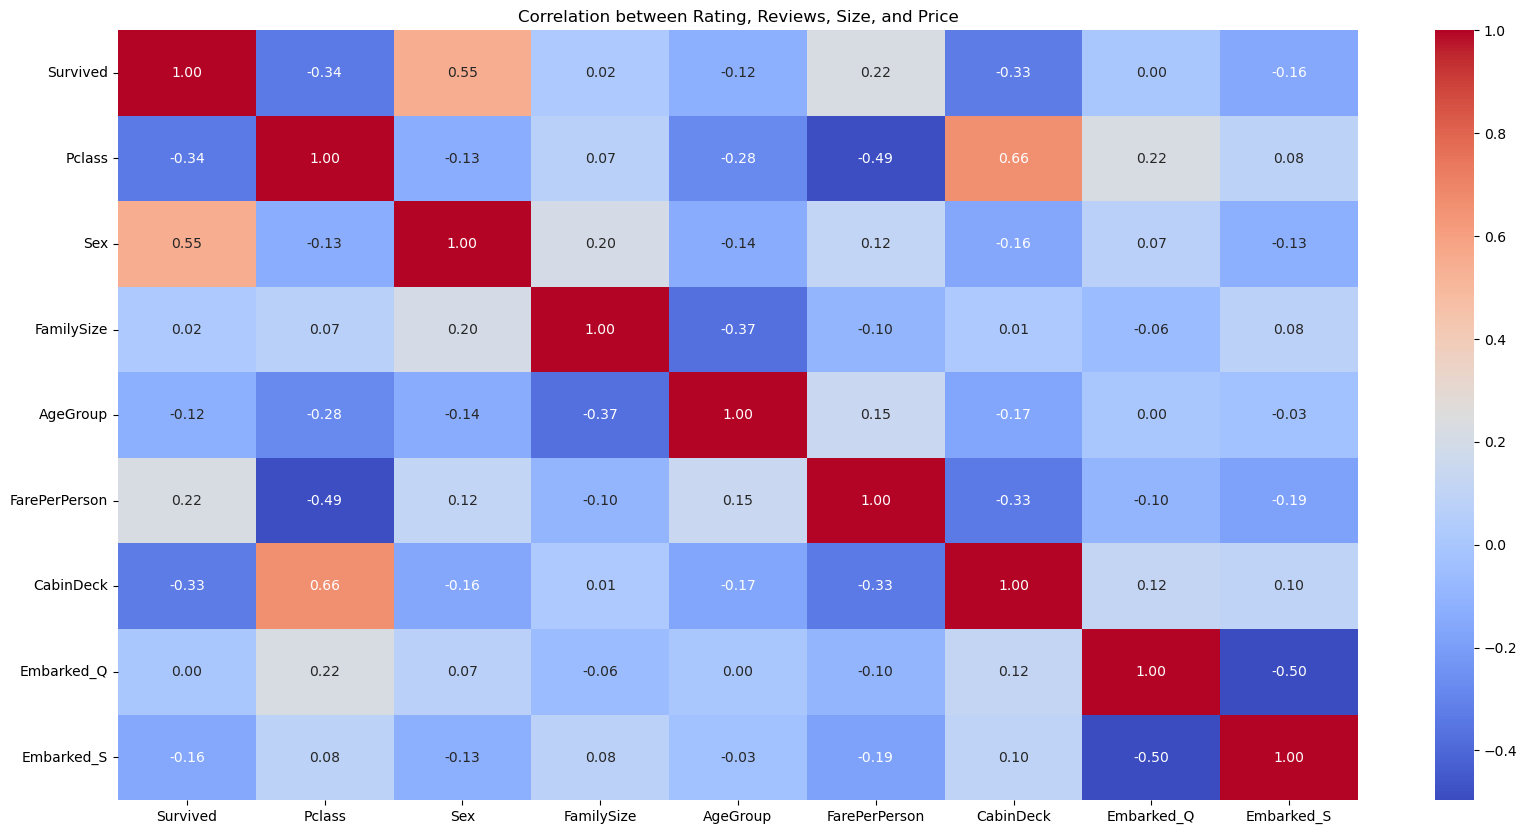

In [788]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between Rating, Reviews, Size, and Price")
plt.show()

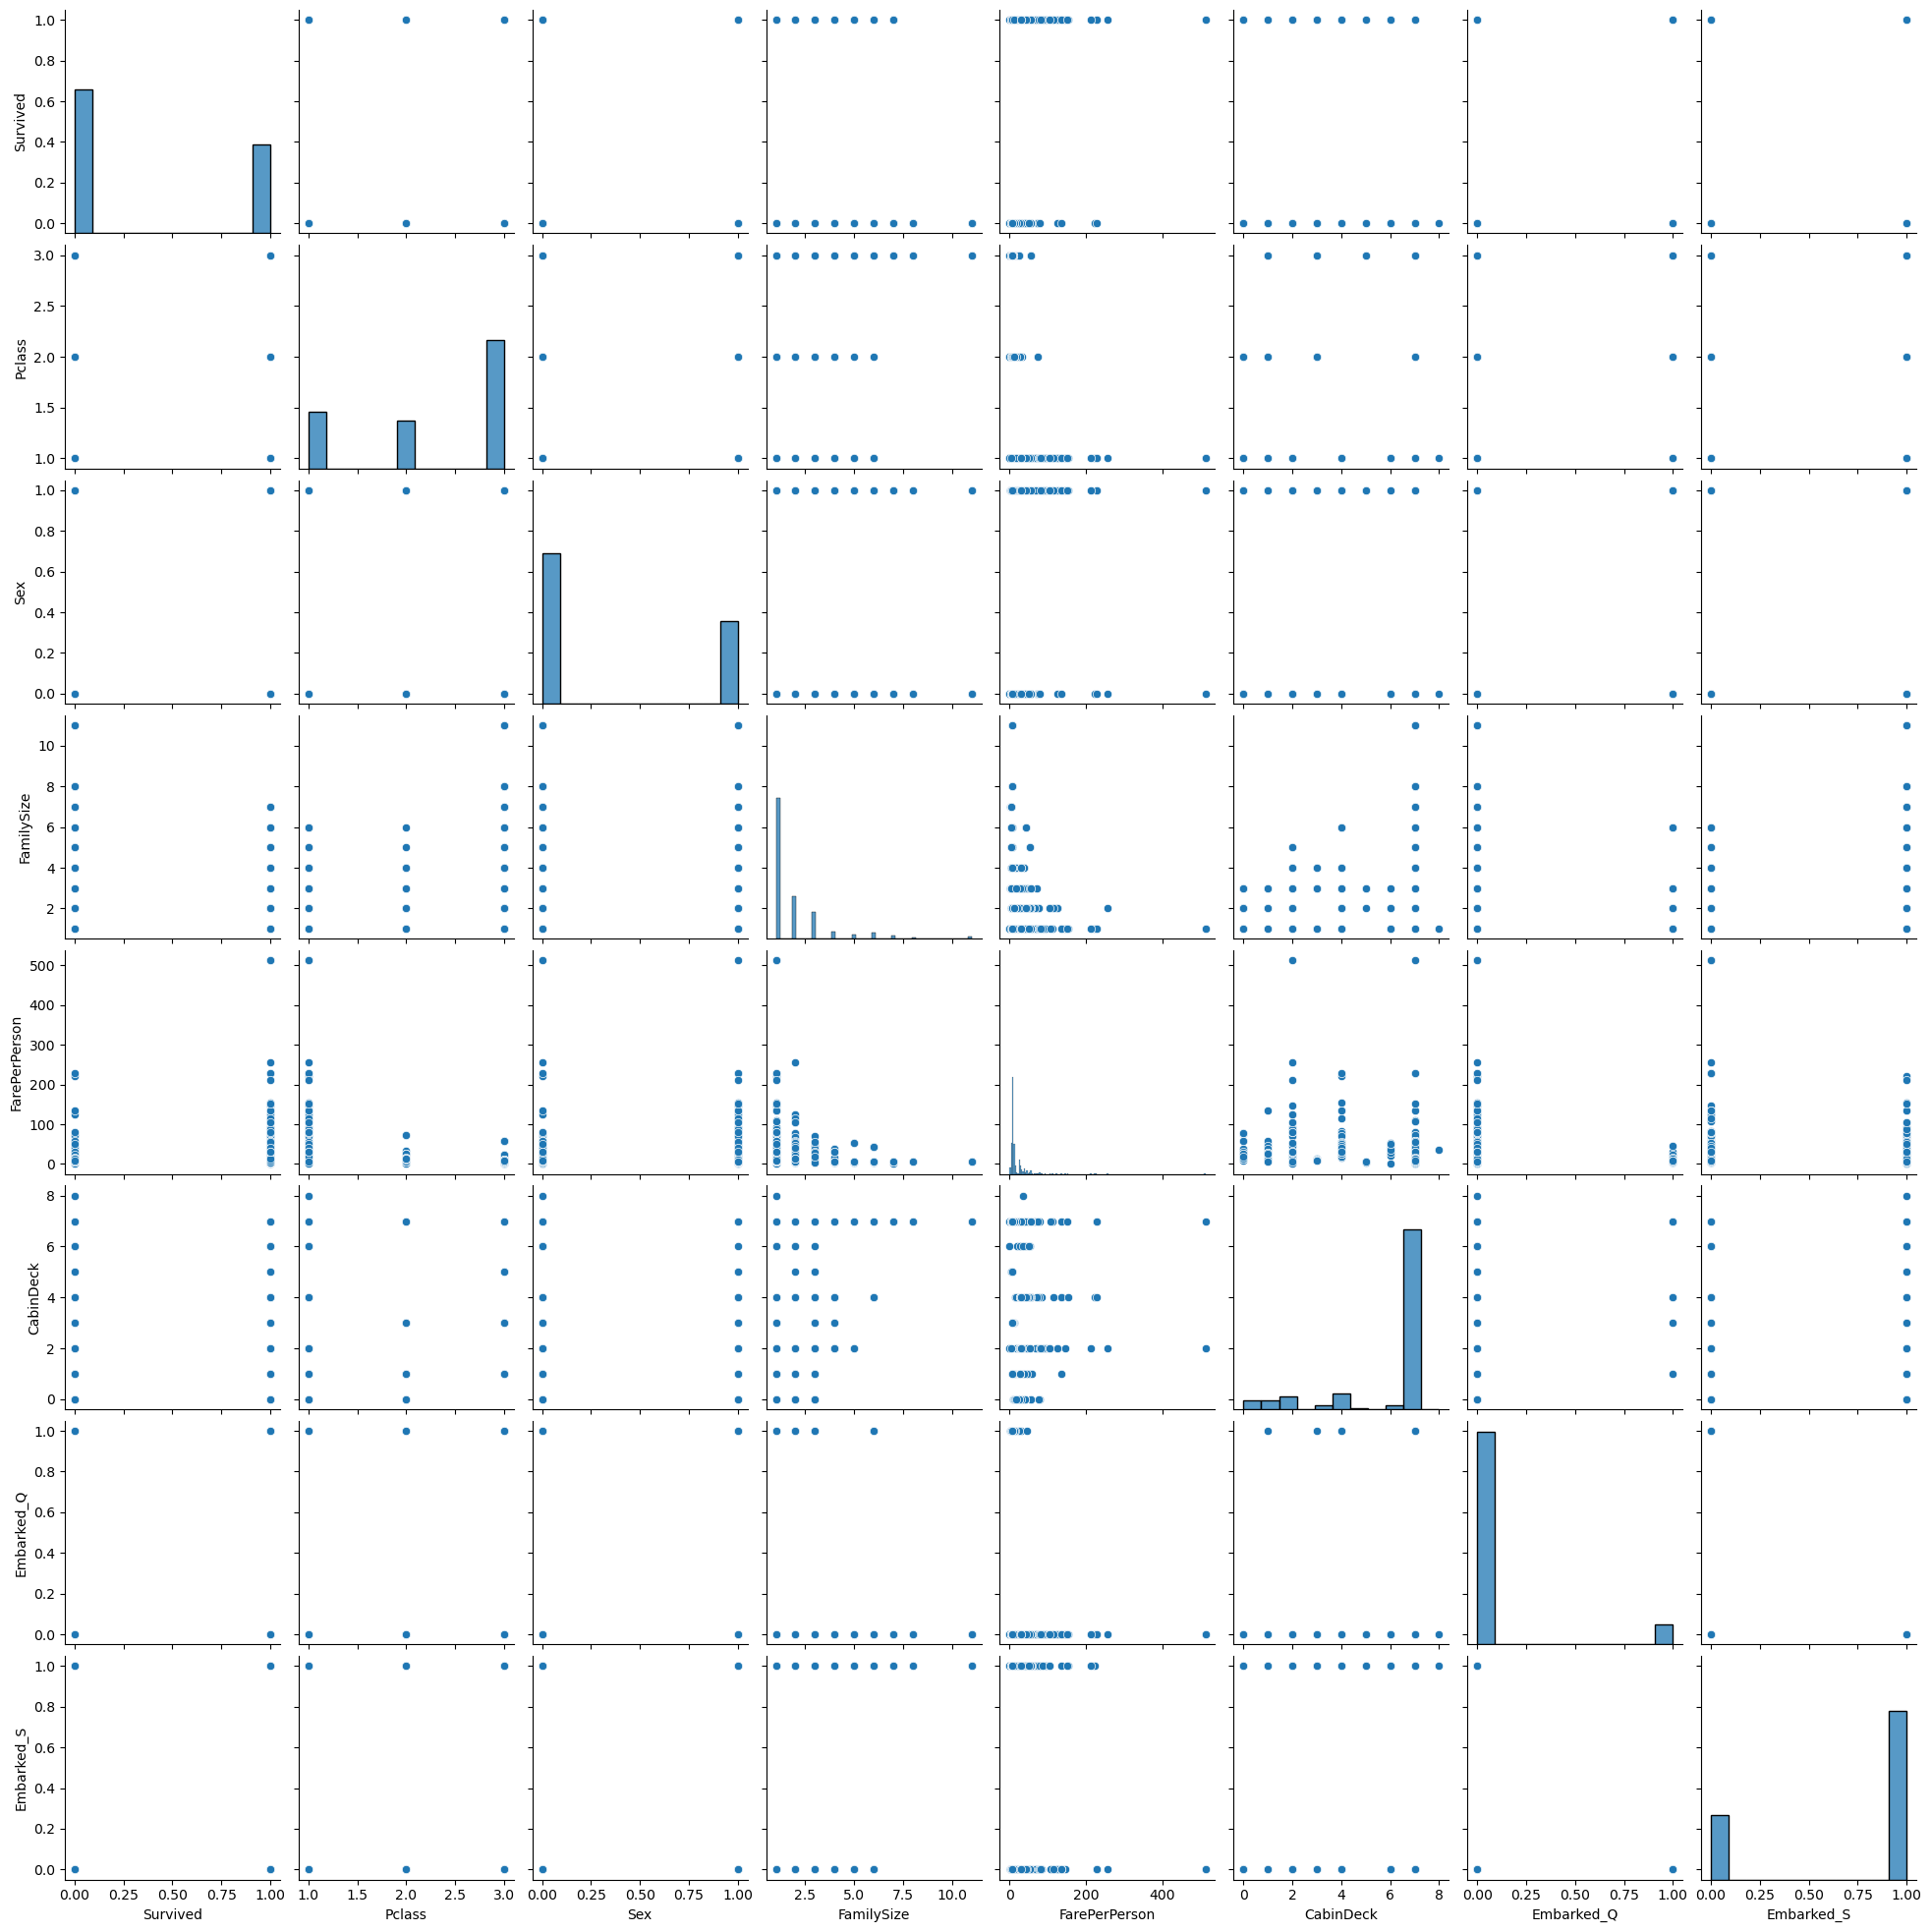

In [789]:
sns.pairplot(df)
plt.show()

### Splitting the data

In [790]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=["Survived"])
y = df["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Solving skewness of FairPerPerson.

In [791]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log1p)

X_train["FarePerPerson"] = log_transformer.fit_transform(X_train[['FarePerPerson']])
X_test["FarePerPerson"] = log_transformer.transform(X_test[['FarePerPerson']])

In [792]:
X_train.head()

,Pclass,Sex,FamilySize,AgeGroup,FarePerPerson,CabinDeck,Embarked_Q,Embarked_S
621,1,0,2,3,3.306048,0,0,1
481,2,0,1,3,0.000000,7,0,1
527,1,0,1,3,5.406181,4,0,1
432,2,1,2,3,2.639057,7,0,1
801,2,1,3,3,2.277267,7,0,1


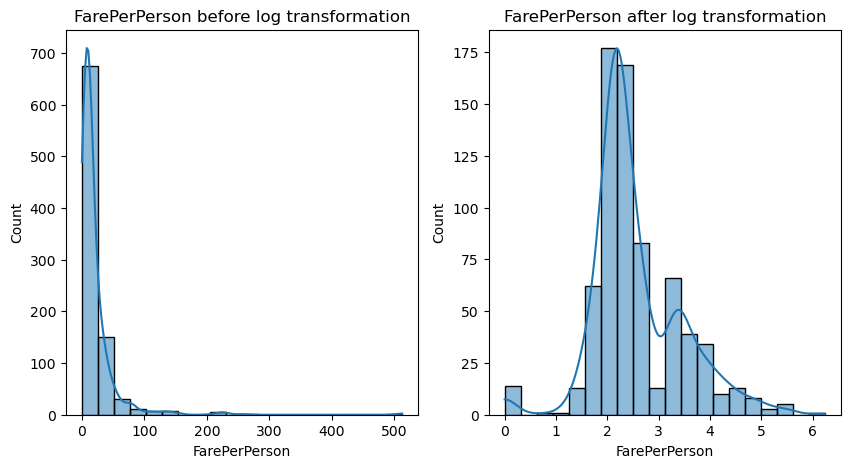

In [797]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(X_train["FarePerPerson"], bins=20, kde=True, ax = axes[1])
axes[1].set_title("FarePerPerson after log transformation")
sns.histplot(df["FarePerPerson"], bins=20, kde=True, ax = axes[0])
axes[0].set_title("FarePerPerson before log transformation")
plt.show()

## Model Training and Evaluation

In [799]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

# 1. Logistic Regression

In [801]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 81.60%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.837719    0.777344  0.816011    0.807532      0.814570
recall       0.870159    0.728938  0.816011    0.799549      0.816011
f1-score     0.853631    0.752363  0.816011    0.802997      0.814802
support    439.000000  273.000000  0.816011  712.000000    712.000000
_______________________________________________
Confusion Matrix: 
 [[382  57]
 [ 74 199]]

Test Result:
Accuracy Score: 78.09%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.814159   0.723077  0.780899    0.768618      0.779364
recall       0.836364   0.691176  0.780899    0.763770      0.780899
f1-score     0.825112   0.706767  0.780899    0.765940      0.779902
support    110.000000  68.000000  0.780899  178.000000    178.00000

In [804]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2', 'elasticnet'], 'solver': ['saga'], 'l1_ratio': [0, 0.5, 1]}

lr = LogisticRegression(max_iter=1000)
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='f1')

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation F1 Score:", grid_search.best_score_)

best_model = grid_search.best_estimator_
print("\nTrain Performance:")
print_score(best_model, X_train, y_train, X_test, y_test, train=True)
print("\nTest Performance:")
print_score(best_model, X_train, y_train, X_test, y_test, train=False)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-

Best Parameters: {'C': 1, 'l1_ratio': 0, 'penalty': 'l2', 'solver': 'saga'}
Best Cross-Validation F1 Score: 0.7455749812474757

Train Performance:
Train Result:
Accuracy Score: 81.60%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.837719    0.777344  0.816011    0.807532      0.814570
recall       0.870159    0.728938  0.816011    0.799549      0.816011
f1-score     0.853631    0.752363  0.816011    0.802997      0.814802
support    439.000000  273.000000  0.816011  712.000000    712.000000
_______________________________________________
Confusion Matrix: 
 [[382  57]
 [ 74 199]]


Test Performance:
Test Result:
Accuracy Score: 78.65%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.815789   0.734375  0.786517    0.775082      0.784687
recall       0.845455   0.691176  0.786

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


### Tuned logistic regression is slightly higher in the test than basic logistic regression.

# 2. Decision Tree

In [806]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

print_score(dt_clf, X_train, y_train, X_test, y_test, train=True)
print_score(dt_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 95.93%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.949561    0.976562   0.95927    0.963062      0.959914
recall       0.986333    0.915751   0.95927    0.951042      0.959270
f1-score     0.967598    0.945180   0.95927    0.956389      0.959002
support    439.000000  273.000000   0.95927  712.000000    712.000000
_______________________________________________
Confusion Matrix: 
 [[433   6]
 [ 23 250]]

Test Result:
Accuracy Score: 74.72%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.809524   0.657534  0.747191    0.733529      0.751460
recall       0.772727   0.705882  0.747191    0.739305      0.747191
f1-score     0.790698   0.680851  0.747191    0.735774      0.748734
support    110.000000  68.000000  0.747191  178.000000    178.00000

## Basic DT has been overfitted.

In [807]:
param_grid = {"max_depth": [3, 5, 7, 10], "min_samples_split": [2, 5, 10, 20], "min_samples_leaf": [1, 2, 5, 10], "criterion": ["gini", "entropy"]}

dt = DecisionTreeClassifier()
grid_search_dt = GridSearchCV(dt, param_grid, cv=5, scoring="f1")

grid_search_dt.fit(X_train, y_train)
print("Best Parameters:", grid_search_dt.best_params_)
print("Best Cross-Validation F1 Score:", grid_search_dt.best_score_)

best_dt = grid_search_dt.best_estimator_
print_score(best_dt, X_train, y_train, X_test, y_test, train=True)
print_score(best_dt, X_train, y_train, X_test, y_test, train=False)

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Cross-Validation F1 Score: 0.7655143718673771
Train Result:
Accuracy Score: 90.87%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.892857    0.940678  0.908708    0.916768      0.911193
recall       0.968109    0.813187  0.908708    0.890648      0.908708
f1-score     0.928962    0.872299  0.908708    0.900630      0.907236
support    439.000000  273.000000  0.908708  712.000000    712.000000
_______________________________________________
Confusion Matrix: 
 [[425  14]
 [ 51 222]]

Test Result:
Accuracy Score: 79.21%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.823009   0.738462  0.792135    0.780735      0.790710
recall       0.845455   0.705882  0.792135    0

### Still, the 11.66% gap is concerning as a risk of still overfitted.

# 3. Random Forest

In [808]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 95.93%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.953540    0.969231   0.95927    0.961385      0.959556
recall       0.981777    0.923077   0.95927    0.952427      0.959270
f1-score     0.967452    0.945591   0.95927    0.956522      0.959070
support    439.000000  273.000000   0.95927  712.000000    712.000000
_______________________________________________
Confusion Matrix: 
 [[431   8]
 [ 21 252]]

Test Result:
Accuracy Score: 76.40%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.803571   0.696970  0.764045    0.750271      0.762847
recall       0.818182   0.676471  0.764045    0.747326      0.764045
f1-score     0.810811   0.686567  0.764045    0.748689      0.763347
support    110.000000  68.000000  0.764045  178.000000    178.00000

### Overfit

In [809]:
n_estimators = [100, 500, 1000, 1500]
max_depth = [2, 3, 5]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4, 10]
bootstrap = [True, False]

params_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = GridSearchCV(rf_clf, params_grid, scoring="f1", cv=3, verbose=2, n_jobs=-1)


rf_cv.fit(X_train, y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 384 candidates, totalling 1152 fits
[CV] END bootstrap=True, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.6s
[CV] END bootstrap=True, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.6s
[CV] END bootstrap=True, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.6s
[CV] END bootstrap=True, max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END

## Still overfitted, so not helpful model.

#### Conclusion:
#### We can make further modifications to have better results:
#### Try another approach as dropping weaker features (Embarked_S and Embarked_Q)
#### Logistic Regression is now the best model used in this task, others overfit.

# ------------------------------------------------------------------------------------------------------------------------

# Now we want to try our models on the test.csv